# 13. Volatility and IR Options

## Overview

* The most liquid nonlinear OCT rates products are SOFR caps, floors and SOFR swaptions
* This chapter is an overview of SOFR caps, floors and swaptions, and their pricing and heding

## Sell Side Rates Options Business

* In the rates options business, there are exotic products and vanilla products
    * Vanilla products: SOFR caps, floors and SOFR swaptions
    * Examples of exotics: Bermudan swaptions, CMS swaps, CMS caps and floors, CMS spread options, range accrual
* Exotic desk traders hedge their books by trading vanilla products
* Vanilla desk traders do so by trading underlying linear products (SOFR swaps, FRA or futures)
* More complicated models are needed for exotics pricing and hedging
    * Since exotics are hedged by vanillas, the pricing model has to give consistent pricing of both exotics and vanillas
    * Thus, the models are calibrated to vanillas

## Sell Side Rates Options Business (Cont.)

* All risk hedged out, where is the revenue from?
    * Think of zero delta ladder, portfolio PnL will be zero no matter how the market moves
    * Traders can still intentionally over/under hedge, taking directional risk, but there is in house delta limit as regulator is watching
    * Part of the revenue is from fees and bid ask spreads
* The more exotic the product is, the higher the fees and bid ask spreads, and hence the revenue
    * Justified by the significant investment in a quant team of PhDs to build and maintain the model, the hardware, and limited market players
    * Only 4-5 banks have a working model to quote/trade all rates exotics
    * Even with a working model, sometimes trade from a client can be too risky for small banks to take in
    * The larger the book is, the more risk a bank can safely take

## Option Pricing Basics

* PV of an option can be computed by no-arbitrage argument, like many previous examples
* But unlike previous no-arbitrage arguments, option pricing requires assumptions (models)
* The simpliest option pricing model is the Binomial Option Pricing Model (BOPM)

## BOPM Assumptions

* We want to price an option on a stock trading at $S$ currently
* There are only two discrete times (one time step)
    * Today at $t=0$, 
    * Maturity of the option at $t=1$
* At $t=1$, the stock price can either go up to $S_u$ or go down to $S_d$ (two states)
* Option payoff at $t=1$ is $C_u$ if the stock goes up and $C_d$ if it goes down
    * If it is a call option then $C_u = (S_u - K)^+$ and $C_d = (S_d - K)^+$ 

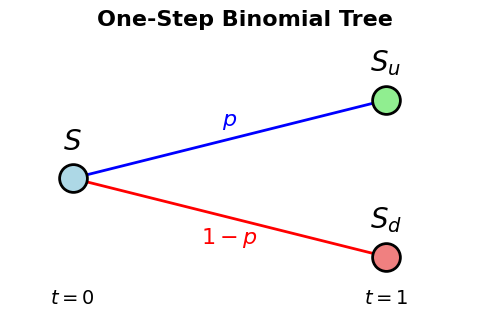

In [20]:
# Single-step binomial tree visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(5, 3))

# Node positions
t0_x, t0_y = 0, 0.5
t1_u_x, t1_u_y = 1, 0.75
t1_d_x, t1_d_y = 1, 0.25

# Draw edges (branches)
ax.plot([t0_x, t1_u_x], [t0_y, t1_u_y], 'b-', lw=2, label='Up move')
ax.plot([t0_x, t1_d_x], [t0_y, t1_d_y], 'r-', lw=2, label='Down move')

# Draw nodes
node_size = 400
ax.scatter([t0_x], [t0_y], s=node_size, c='lightblue', edgecolors='black', zorder=5, linewidths=2)
ax.scatter([t1_u_x], [t1_u_y], s=node_size, c='lightgreen', edgecolors='black', zorder=5, linewidths=2)
ax.scatter([t1_d_x], [t1_d_y], s=node_size, c='lightcoral', edgecolors='black', zorder=5, linewidths=2)

# Add labels
ax.text(t0_x, t0_y+0.12, r'$S$', fontsize=20, ha='center', va='center', fontweight='bold')
ax.text(t1_u_x, t1_u_y+0.12, r'$S_u$', fontsize=20, ha='center', va='center', fontweight='bold')
ax.text(t1_d_x, t1_d_y+0.12, r'$S_d$', fontsize=20, ha='center', va='center', fontweight='bold')

# Add probability labels on branches
ax.text(0.5, 0.65, r'$p$', fontsize=16, ha='center', va='bottom', color='blue', style='italic')
ax.text(0.5, 0.35, r'$1-p$', fontsize=16, ha='center', va='top', color='red', style='italic')

# Time labels
ax.text(t0_x, 0.15, r'$t=0$', fontsize=14, ha='center', va='top')
ax.text(t1_u_x, 0.15, r'$t=1$', fontsize=14, ha='center', va='top')

# Formatting
ax.set_xlim(-0.2, 1.3)
ax.set_ylim(0.2, 0.9)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('One-Step Binomial Tree', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

## BOPM No-Arbitrage Argument

* We set up a portfolio so that, at $t=1$, the portfolio value replicates the option in both states
* By no-arbitrage argument, the option price at $t=0$ should equals the portfolio value at $t=0$
* The portfolio setup at $t=0$:
    * Buy $h$ share of the stock at $S$
    * Deposit $B$ dollars into the money market account (MMA)
* Initial portfolio value is $hS+B$
* At $t=1$ there are two states 
    * Stock position value goes up to $hS_u$ and cash in MMA grows into $BM$ dollars
    * Stock position value goes down to $hS_d$ and cash in MMA grows into $BM$ dollars
* To replicate the option payoff, set
\begin{align*}
hS_u + BM &= C_u\\
hS_d + BM &= C_d
\end{align*}
* Solve for $h$ and $B$ and find the initial portfolio value, which should equal the option price

## BOPM 

* We have the system of equations written in matrix form
\begin{align*}
\begin{pmatrix}
S_u & M\\
S_d & M
\end{pmatrix}
\begin{pmatrix}
h \\ B
\end{pmatrix}
=
\begin{pmatrix}
C_u \\ C_d
\end{pmatrix}
\end{align*}
* The solution is
\begin{align*}
\begin{pmatrix}
h \\ B
\end{pmatrix} = 
\frac{1}{M(S_u - S_d)}
\begin{pmatrix}
M & -M\\
-S_d & S_u
\end{pmatrix}
\begin{pmatrix}
C_u \\ C_d
\end{pmatrix}
\end{align*}
* The option price is $hS + B$, or
\begin{align*}
\begin{pmatrix}
S & 1
\end{pmatrix}
\begin{pmatrix}
h \\ B
\end{pmatrix} &=
\frac{1}{M(S_u - S_d)}
\begin{pmatrix}
S & 1
\end{pmatrix}
\begin{pmatrix}
M & -M\\
-S_d & S_u
\end{pmatrix}
\begin{pmatrix}
C_u \\ C_d
\end{pmatrix}\\
&= \frac{1}{M}
\begin{pmatrix}
\frac{SM - S_d}{S_u - S_d} & \frac{S_u - SM}{S_u - S_d}
\end{pmatrix}
\begin{pmatrix}
C_u \\ C_d
\end{pmatrix}\\
&= \frac{1}{M}
\left(
\frac{SM - S_d}{S_u - S_d} C_u + \frac{S_u - SM}{S_u - S_d} C_d
\right)
\end{align*}

## BOPM Discussion

* PV of the option at $t=0$:
$$
C = \frac{1}{M}
\left(
\frac{SM - S_d}{S_u - S_d} C_u + \frac{S_u - SM}{S_u - S_d} C_d
\right), 
$$
where $1/M$ is the discount factor and
$$
\frac{SM - S_d}{S_u - S_d} + \frac{S_u - SM}{S_u - S_d} = 1, 
$$
which allows us to see $C$ as a discounted expectation of possible option payoff
* Weighted average with weights sum to 1 is an expectation

* We write
$$
\tilde p = \frac{SM - S_d}{S_u - S_d}, \qquad (1-\tilde p) = \frac{S_u - SM}{S_u - S_d}, 
$$ 
known as the risk neutral probability, different from the physical probability $(p, 1-p)$
* The precise statement is, $C$ is a discounted expectation of possible option payoff under the risk neutral probability

## BOPM Discussion (Cont.)

* The physical probability $(p, 1-p)$ doesn't go into option pricing
    * No matter how large $p$ is (how likely the stock price will go up), the call option price doesn't go up a bit in BOPM
    * Remember the option price we obtained is by a no-arbitrage argument. Quoting a different price will lead to an arbitrage opportunity

## BOPM: Example

* Consider an ATM call option in BOPM with $S = K = 100$, $K$ the strike price, and $S_u = 105$, $S_d = 95$, $M=1.01$. Option payoff at $t=1$ is
\begin{align*}
C_u &= (S_u - K)^+ = 5\\
C_d &= (S_d - K)^+ = 0
\end{align*}
* PV of the option at $t=0$ is
\begin{align*}
C &= \frac{1}{M}
\left(
\frac{SM - S_d}{S_u - S_d} C_u + \frac{S_u - SM}{S_u - S_d} C_d
\right)\\
&= \frac{1}{1.01}\left(
\frac{101 - 95}{105 - 95} \times 5 + \frac{105 - 101}{105 - 95} \times 0
\right) = \$ 2.970297
\end{align*}

## BOPM: Example (Cont.)

* One can compute the replicating portfolio as follows
\begin{align*}
\begin{pmatrix}
h \\ B
\end{pmatrix} &= 
\frac{1}{M(S_u - S_d)}
\begin{pmatrix}
M & -M\\
-S_d & S_u
\end{pmatrix}
\begin{pmatrix}
C_u \\ C_d
\end{pmatrix}\\
&= 
\frac{1}{1.01\times (105 - 95)}
\begin{pmatrix}
1.01 & -1.01\\
-95 & 105
\end{pmatrix}
\begin{pmatrix}
5 \\ 0
\end{pmatrix} =
\begin{pmatrix}
0.5 \\ -47.0297
\end{pmatrix}
\end{align*}
* Buy $0.5$ shares of the underlying and borrow $\$47.0297$ in MMA at $t=0$. The portfolio value at $t=1$, in the cases the stock goes up and down, are
\begin{align*}
0.5\times 105 - 47.0297\times 1.01 &= \$5,\\
0.5\times 95 - 47.0297\times 1.01 &= \$0, 
\end{align*}
respctively, which equal $C_u$ and $C_d$

## BOPM: Example (Cont..)

* So far in the example, there is no physical probability $p$ (because there is no need)
* If an agent is confident the stock will go up (meaning the belief is the option price at $t=1$ will be $\$5$ with high probability $p$), and quotes $C=\$4$ at today ($t=0$), how can you arbitrage? 

* Short sell the option to the agent to get $\$4$ and spend $\$2.970297$ to set up the replicating portfolio today. Your net cash inflow is $4-2.970297 = \$1.029703$ at $t=0$
* At $t=1$, your obligation as an option writer (seller) is to pay the agent $\$5$ if the stock goes up, and $\$0$ if the stock goes down

* But at $t=1$, the replicating portfolio value is $\$5$ if stock goes up and $\$0$ if it goes down
* In either case, you can liquidate the portfolio to fullfill your obligation
* You are left with free cash inflow of $\$1.029703$ at $t=0$

## BOPM: Example (Cont...)

* If the stock price did go up at $t=1$ as expected by the agent, you pay the agent $\$1$, as you sold the option at time $t=0$ at the price $\$4$ and buy it back at time $t=1$ at the price $C_u = \$5$
* But you still get to keep your risk free cash flow of $\$1.029703$ at $t=0$
* If you think this is a win-win situation as no one gets hurt, you are wrong
* The agent could have made $\$2$ by quoting the option at $\$3$
* There is still room ($3-2.970297 = \$0.029703$) for arbitrage, and the market players will be happy to make the risk free profit

## BOPM: Exercise

* What's the time zero PV of an ATM call option in BOPM with $S = K = 100$, $K$ the strike price, and $S_u = 103$, $S_d = 97$, $M=1.01$? 
* At $t=0$, how many shares should you hold and how much money should you put in your MMA in order to set up a replicating portfolio? 

## Universal Option Pricing Formula

* We've seen in BOPM that option price is a discounted expectation in the risk-neutral probability
* This is true in general, regardless of the model (assumptions) used for the option pricing
* Let $X$ be any European payoff, a function of the underlying. Then the option price $C$ is 
\begin{align*}
C = M_0 \widetilde E[M_T^{-1} X]
\end{align*}
* An option pricing model specifies a distribution of the underlying (among other things), in the risk-neutral probability $\widetilde P$
* Given the distribution, $C$ is simply an integral

## Change of Numeraire

* The universal pricing formula
\begin{align*}
C = M_0 \widetilde E[M_T^{-1} X]
\end{align*}
is a special case of an even more general result
* When we say $S=\$100$ that means $100$ USD, or $100$ units of MMA
* Any tradable asset can be used to denominate the underlying of the option
    * Examples are annuity and ZCB
    * "The underlying is trading at how many units of the annuity?"
    * The tradable asset used to denominate the underlying is known as the *numeraire*
    * Each numeraire is associated with a so-called *equivalent martingle measure*
    * The risk-neutral probability a special case of the equivalent martingle measure when using MMA as the numeraire
* Let $N_t$ be the numeraire used in option pricing, and the corresponding equivalent martingle measure is $P^N$, then the time zero option price is 
\begin{align*}
C &= N_0 E^N[N_T^{-1} X]
\end{align*}

## Change of Numeraire (Cont.)

* The universal pricing formula
\begin{align*}
C = M_0 E^M[M_T^{-1} X] = N_0 E^N[N_T^{-1} X]
\end{align*}
* If you change a numeraire, you change a probability measure, and the distribution of the underlying
    * In fact, sometimes that's the reaosn we change the numeraire: In the risk-neutral measure the distribution under some model is not known in closed form, but the distribution is known in closed form in a different measure so we can write the expectation as an integral
    * We will see example in SOFR caps and floors pricing
* An option pricing model can also specify a distribution of the underlying (among other things), in any equivalent martingle measure

## SOFR Caps and Floors

* Consider a tenor structure
$$
T_0 < T_1 < T_2 < \cdots < T_N, \qquad \tau_n = T_{n+1} - T_n\quad \forall n=0, 1, 2, \ldots, N-1, 
$$
where $\tau_n$ is now fixed to be 3M
* A 3M SOFR cap with strike $K$ pays the buyer a series of cash flows
$$
\tau_n(L(T_{n+1}, T_{n}, T_{n+1}) - K)^+ \quad\text{ at }\quad T_{n+1}, \quad \forall n=0, 1, 2, \ldots, N-1, 
$$
where $L(T_{n+1}, T_{n}, T_{n+1})$ is the SOFR term rate
* Similarly, a 3M SOFR floor with strike $K$ pays the buyer a series of cash flows
$$
\tau_n(K - L(T_{n+1}, T_{n}, T_{n+1}))^+ \quad\text{ at }\quad T_{n+1} \quad \forall n=0, 1, 2, \ldots, N-1
$$

## Why the Name

* Imagine you have liabilities to pay floating coupon $\tau_n L(T_{n+1}, T_n, T_{n+1})$ every quarter (3M)
* The payment to be made is unknown until the end of every coupon period, $T_{n+1}$

* If you buy a cap with $K = 6\%$, when the term rate fixes to be lower than $6\%$, from the cap you recieve nothing: 
$$
\tau_n(L(T_{n+1}, T_n, T_{n+1}) - K)^+ = 0
$$
* Given the liability, you will pay a lower than $6\%$ coupon rate: $\tau_n L(T_{n+1}, T_n, T_{n+1})$

* But if the forward rate fixed to be larger than $6\%$, from the cap you recieve
$$
\tau_n(L(T_{n+1}, T_n, T_{n+1}) - K)^+ = \tau_n(L(T_{n+1}, T_n, T_{n+1}) - K)
$$
* Given the liability, you still pay a the coupon $\tau_n L(T_{n+1}, T_n, T_{n+1})$
* Overall you pay $\tau_n K$ which is at $6\%$ annual coupon rate
* If you buy a $6\%$ cap, your payment is capped at $6\%$ annual rate

## Why the Name -- Floor